In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [24]:
df = pd.read_csv('data/StudentPerformanceFactors.csv')

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


results = pd.DataFrame(columns=[
    'Predictor', 'P-value', 'R-squared', 'Adj_R-squared', 
    'VIF', 'T-statistic', 'F-statistic', 'AIC', 'BIC',
    'ANOVA_T1_SumSq', 'ANOVA_T1_F', 'ANOVA_T1_P', 
    'ANOVA_T2_SumSq', 'ANOVA_T2_F', 'ANOVA_T2_P', 
    'ANOVA_T3_SumSq', 'ANOVA_T3_F', 'ANOVA_T3_P'
])

for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    # OLS results
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    aic = model.aic  # Add AIC
    bic = model.bic  # Add BIC
    
    # Correlation
    correlation = pd.Series(X_scaled[:, i]).corr(y)
    
    # ANOVA analysis
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=df_encoded).fit()

    anova_type1 = sm.stats.anova_lm(model_anova, typ=1)
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    anova_type1_sumsq = anova_type1['sum_sq'].iloc[0]
    
    anova_type2 = sm.stats.anova_lm(model_anova, typ=2)
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    anova_type2_sumsq = anova_type2['sum_sq'].iloc[0]
    
    anova_type3 = sm.stats.anova_lm(model_anova, typ=3)
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    anova_type3_sumsq = anova_type3['sum_sq'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'AIC': [aic],  
        'BIC': [bic],  
        'ANOVA_T1_SumSq': [anova_type1_sumsq],
        'ANOVA_T1_F': [anova_type1_f],
        'ANOVA_T1_P': [anova_type1_p],
        'ANOVA_T2_SumSq': [anova_type2_sumsq],
        'ANOVA_T2_F': [anova_type2_f],
        'ANOVA_T2_P': [anova_type2_p],
        'ANOVA_T3_SumSq': [anova_type3_sumsq],
        'ANOVA_T3_F': [anova_type3_f],
        'ANOVA_T3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

# Sort the results
results_sorted = results.sort_values(by='ANOVA_T2_SumSq', ascending=False)
results_sorted

,Predictor,P-value,R-squared,Adj_R-squared,VIF,T-statistic,F-statistic,AIC,BIC,ANOVA_T1_SumSq,ANOVA_T1_F,ANOVA_T1_P,ANOVA_T2_SumSq,ANOVA_T2_F,ANOVA_T2_P,ANOVA_T3_SumSq,ANOVA_T3_F,ANOVA_T3_P
1,Attendance,0.000000e+00,0.337645,0.337544,1.005639,58.025740,3366.986498,33982.647834,33996.239604,33759.750584,3366.986498,0.000000e+00,33759.750584,3366.986498,0.000000e+00,3.588864e+05,3.579309e+04,0.0
0,Hours_Studied,0.000000e+00,0.198430,0.198309,1.002895,40.436123,1635.080039,35243.063601,35256.655371,19840.249207,1635.080039,1.286349e-319,19840.249207,1635.080039,1.286349e-319,2.058903e+06,1.696789e+05,0.0
3,Previous_Scores,1.244380e-46,0.030653,0.030506,1.006318,14.452101,208.863214,36498.729319,36512.321089,3064.841946,208.863214,1.244380e-46,3064.841946,208.863214,1.244380e-46,9.508051e+05,6.479558e+04,0.0
4,Tutoring_Sessions,1.650817e-37,0.024500,0.024352,1.002123,12.879738,165.887652,36540.532145,36554.123915,2449.672293,165.887652,1.650817e-37,2449.672293,165.887652,1.650817e-37,1.181043e+07,7.997823e+05,0.0
8,Access_to_Resources_Low,3.952846e-27,0.017465,0.017316,1.339404,-10.835388,117.405623,36588.010865,36601.602635,1746.239146,117.405623,3.952846e-27,1746.239146,117.405623,3.952846e-27,2.411485e+07,1.621324e+06,0.0
6,Parental_Involvement_Low,2.001724e-20,0.012906,0.012756,1.363863,-9.292759,86.355371,36618.598764,36632.190534,1290.371591,86.355371,2.001724e-20,1290.371591,86.355371,2.001724e-20,2.398175e+07,1.604927e+06,0.0
23,Parental_Education_Level_Postgraduate,2.225974e-14,0.008792,0.008642,1.310914,7.654032,58.584203,36646.076892,36659.668662,879.047157,58.584203,2.225974e-14,879.047157,58.584203,2.225974e-14,2.383955e+07,1.588790e+06,0.0
22,Parental_Education_Level_High_School,2.805507e-12,0.007365,0.007214,1.312032,-7.000335,49.004685,36655.581899,36669.173668,736.366522,49.004685,2.805507e-12,736.366522,49.004685,2.805507e-12,1.544644e+07,1.027950e+06,0.0
21,Learning_Disabilities_Yes,4.338624e-12,0.007236,0.007086,1.002828,-6.938544,48.143389,36656.437165,36670.028935,723.517954,48.143389,4.338624e-12,723.517954,48.143389,4.338624e-12,2.681626e+07,1.784373e+06,0.0
25,Distance_from_Home_Near,4.858410e-12,0.007203,0.007053,2.627725,6.922421,47.919911,36656.659098,36670.250868,720.183621,47.919911,4.858410e-12,720.183621,47.919911,4.858410e-12,1.216573e+07,8.094888e+05,0.0


In [3]:
df = pd.read_csv('data/StudentPerformanceFactors.csv')

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


results = pd.DataFrame(columns=[
    'Predictor', 'Correlation', 'P-value', 'R-squared', 'Adj_R-squared', 'VIF', 
    'T-statistic', 'F-statistic', 'AIC', 'BIC'
])

for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    # OLS results
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    aic = model.aic  # Add AIC
    bic = model.bic  # Add BIC
    
    # Correlation
    correlation = pd.Series(X_scaled[:, i]).corr(y)
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'Correlation': [correlation],  # Correlation in the second column
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'AIC': [aic],
        'BIC': [bic]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

# Sort the results
results_sorted = results.sort_values(by='Adj_R-squared', ascending=False)
results_sorted


,Predictor,Correlation,P-value,R-squared,Adj_R-squared,VIF,T-statistic,F-statistic,AIC,BIC
1,Attendance,0.581072,0.000000e+00,0.337645,0.337544,1.005639,58.025740,3366.986498,33982.647834,33996.239604
0,Hours_Studied,0.445455,0.000000e+00,0.198430,0.198309,1.002895,40.436123,1635.080039,35243.063601,35256.655371
3,Previous_Scores,0.175079,1.244380e-46,0.030653,0.030506,1.006318,14.452101,208.863214,36498.729319,36512.321089
4,Tutoring_Sessions,0.156525,1.650817e-37,0.024500,0.024352,1.002123,12.879738,165.887652,36540.532145,36554.123915
8,Access_to_Resources_Low,-0.132155,3.952846e-27,0.017465,0.017316,1.339404,-10.835388,117.405623,36588.010865,36601.602635
6,Parental_Involvement_Low,-0.113602,2.001724e-20,0.012906,0.012756,1.363863,-9.292759,86.355371,36618.598764,36632.190534
23,Parental_Education_Level_Postgraduate,0.093764,2.225974e-14,0.008792,0.008642,1.310914,7.654032,58.584203,36646.076892,36659.668662
22,Parental_Education_Level_High_School,-0.085818,2.805507e-12,0.007365,0.007214,1.312032,-7.000335,49.004685,36655.581899,36669.173668
21,Learning_Disabilities_Yes,-0.085066,4.338624e-12,0.007236,0.007086,1.002828,-6.938544,48.143389,36656.437165,36670.028935
25,Distance_from_Home_Near,0.084870,4.858410e-12,0.007203,0.007053,2.627725,6.922421,47.919911,36656.659098,36670.250868


In [12]:
df = pd.read_csv('data/StudentPerformanceFactors.csv')

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


results = pd.DataFrame(columns=[
    'Predictor',
    'ANOVA_T1_SumSq', 'ANOVA_T1_F', 'ANOVA_T1_P', 
    'ANOVA_T2_SumSq', 'ANOVA_T2_F', 'ANOVA_T2_P', 
    'ANOVA_T3_SumSq', 'ANOVA_T3_F', 'ANOVA_T3_P'
])

for i, predictor in enumerate(X.columns):
    
    # ANOVA analysis
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=df_encoded).fit()

    anova_type1 = anova_lm(model_anova, typ=1)
    anova_type1_sumsq = anova_type1['sum_sq'].iloc[0]
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    
    anova_type2 = anova_lm(model_anova, typ=2)
    anova_type2_sumsq = anova_type2['sum_sq'].iloc[0]
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    
    anova_type3 = anova_lm(model_anova, typ=3)
    anova_type3_sumsq = anova_type3['sum_sq'].iloc[0]
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'ANOVA_T1_SumSq': [anova_type1_sumsq],
        'ANOVA_T1_F': [anova_type1_f],
        'ANOVA_T1_P': [anova_type1_p],
        'ANOVA_T2_SumSq': [anova_type2_sumsq],
        'ANOVA_T2_F': [anova_type2_f],
        'ANOVA_T2_P': [anova_type2_p],
        'ANOVA_T3_SumSq': [anova_type3_sumsq],
        'ANOVA_T3_F': [anova_type3_f],
        'ANOVA_T3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

# Sort the results
results_sorted = results.sort_values(by='ANOVA_T2_SumSq', ascending=False)
results_sorted


,Predictor,ANOVA_T1_SumSq,ANOVA_T1_F,ANOVA_T1_P,ANOVA_T2_SumSq,ANOVA_T2_F,ANOVA_T2_P,ANOVA_T3_SumSq,ANOVA_T3_F,ANOVA_T3_P
1,Attendance,33759.750584,3366.986498,0.000000e+00,33759.750584,3366.986498,0.000000e+00,3.588864e+05,3.579309e+04,0.0
0,Hours_Studied,19840.249207,1635.080039,1.286349e-319,19840.249207,1635.080039,1.286349e-319,2.058903e+06,1.696789e+05,0.0
3,Previous_Scores,3064.841946,208.863214,1.244380e-46,3064.841946,208.863214,1.244380e-46,9.508051e+05,6.479558e+04,0.0
4,Tutoring_Sessions,2449.672293,165.887652,1.650817e-37,2449.672293,165.887652,1.650817e-37,1.181043e+07,7.997823e+05,0.0
8,Access_to_Resources_Low,1746.239146,117.405623,3.952846e-27,1746.239146,117.405623,3.952846e-27,2.411485e+07,1.621324e+06,0.0
6,Parental_Involvement_Low,1290.371591,86.355371,2.001724e-20,1290.371591,86.355371,2.001724e-20,2.398175e+07,1.604927e+06,0.0
23,Parental_Education_Level_Postgraduate,879.047157,58.584203,2.225974e-14,879.047157,58.584203,2.225974e-14,2.383955e+07,1.588790e+06,0.0
22,Parental_Education_Level_High_School,736.366522,49.004685,2.805507e-12,736.366522,49.004685,2.805507e-12,1.544644e+07,1.027950e+06,0.0
21,Learning_Disabilities_Yes,723.517954,48.143389,4.338624e-12,723.517954,48.143389,4.338624e-12,2.681626e+07,1.784373e+06,0.0
25,Distance_from_Home_Near,720.183621,47.919911,4.858410e-12,720.183621,47.919911,4.858410e-12,1.216573e+07,8.094888e+05,0.0


In [13]:
selected_predictors = [
    'Attendance', 
    'Hours_Studied', 
    'Previous_Scores', 
    'Tutoring_Sessions', 
    'Access_to_Resources_Low', 
    'Parental_Involvement_Low'
]

X = df_encoded[selected_predictors]
y = df_encoded['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)  # Add the intercept
model = sm.OLS(y_train, X_train_scaled).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1233.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:01:03   Log-Likelihood:                -10721.
No. Observations:                4624   AIC:                         2.146e+04
Df Residuals:                    4617   BIC:                         2.150e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2368      0.036   1858.359      0.0

In [12]:
X_test_scaled = sm.add_constant(X_test_scaled)  
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')


Mean Squared Error on the test set: 4.280216303056111


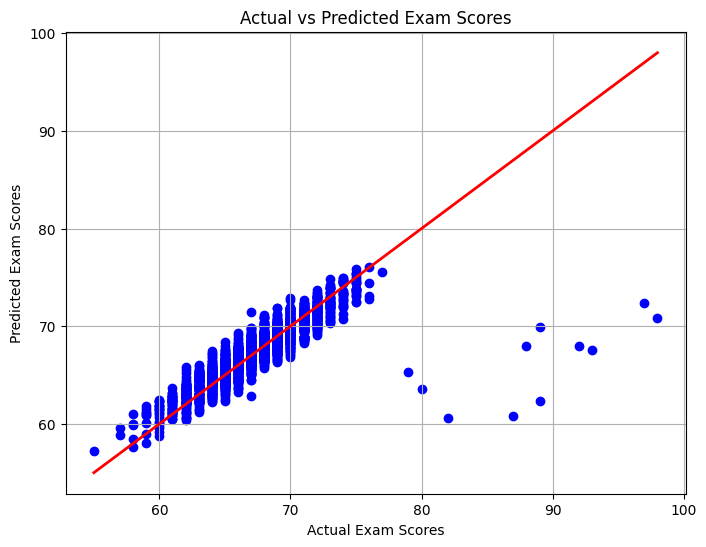

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()

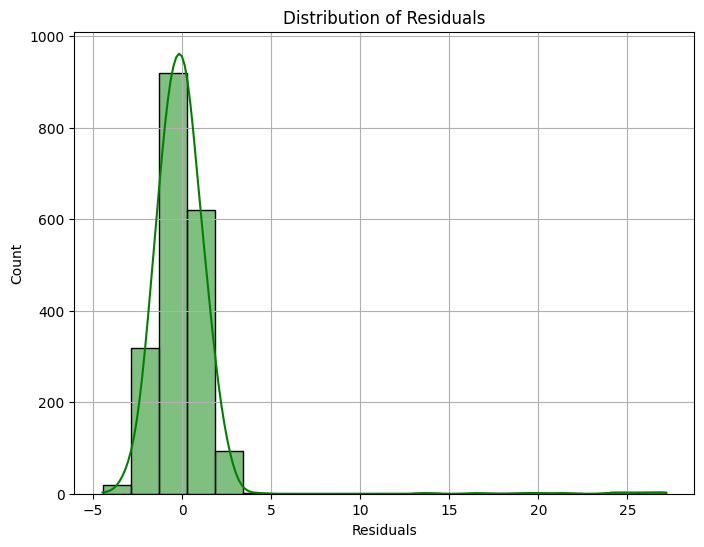

In [14]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='green', bins=20)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

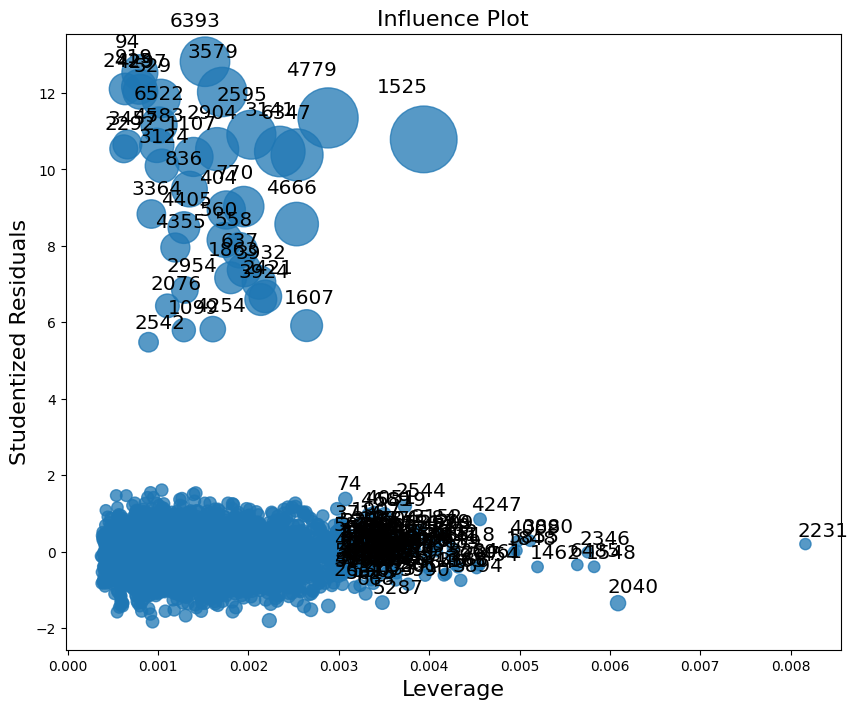

In [15]:
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(10, 8))
influence_plot(model, ax=ax, criterion="cooks")

plt.show()


# Transformations after Predictor Selection

## Original

In [45]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/StudentPerformanceFactors.csv')

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define predictors and target
predictors = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 
              'Access_to_Resources_Low', 'Parental_Involvement_Low']
X = df_encoded[predictors]
y = df_encoded['Exam_Score']

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Original model without transformation
X_const = sm.add_constant(X_scaled)
model_orig = sm.OLS(y, X_const).fit()
print("Original Model Summary")
print(model_orig.summary())


Original Model Summary
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1920.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:51:43   Log-Likelihood:                -15014.
No. Observations:                6607   AIC:                         3.004e+04
Df Residuals:                    6600   BIC:                         3.009e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2357      0.

## Log

In [47]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/StudentPerformanceFactors.csv')

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define predictors and target
predictors = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 
              'Access_to_Resources_Low', 'Parental_Involvement_Low']
X = df_encoded[predictors]
y = df_encoded['Exam_Score']

# Log transform both predictors and target
X_log = np.log(X + 1)  # Adding 1 to avoid issues with log(0)
y_log = np.log(y + 1)

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

# Original model with log-transformed variables
X_const = sm.add_constant(X_scaled)
model_log = sm.OLS(y_log, X_const).fit()
print("Log Transformation Model Summary")
print(model_log.summary())


Log Transformation Model Summary
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     2159.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:54:01   Log-Likelihood:                 13356.
No. Observations:                6607   AIC:                        -2.670e+04
Df Residuals:                    6600   BIC:                        -2.665e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.22

## Square Root

In [48]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/StudentPerformanceFactors.csv')

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define predictors and target
predictors = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 
              'Access_to_Resources_Low', 'Parental_Involvement_Low']
X = df_encoded[predictors]
y = df_encoded['Exam_Score']

# Square root transform both predictors and target
X_sqrt = np.sqrt(X)
y_sqrt = np.sqrt(y)

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sqrt)

# Model with square root transformed variables
X_const = sm.add_constant(X_scaled)
model_sqrt = sm.OLS(y_sqrt, X_const).fit()
print("Square Root Transformation Model Summary")
print(model_sqrt.summary())


Square Root Transformation Model Summary
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:56:29   Log-Likelihood:                 3750.1
No. Observations:                6607   AIC:                            -7486.
Df Residuals:                    6600   BIC:                            -7439.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

## Box-Cox

In [50]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('data/StudentPerformanceFactors.csv')

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define predictors and target
predictors = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 
              'Access_to_Resources_Low', 'Parental_Involvement_Low']
X = df_encoded[predictors]
y = df_encoded['Exam_Score']

# Apply Box-Cox transformation to both predictors and target
X_boxcox = X.apply(lambda x: stats.boxcox(x + 1)[0])  # Adding 1 to avoid issues with zeros
y_boxcox, fitted_lambda = stats.boxcox(y + 1)  # Transform target variable

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boxcox)

# Model with Box-Cox transformed variables
X_const = sm.add_constant(X_scaled)
model_boxcox = sm.OLS(y_boxcox, X_const).fit()
print("Box-Cox Transformation Model Summary")
print(f"Lambda used for Box-Cox Transformation: {fitted_lambda}")
print(model_boxcox.summary())



Box-Cox Transformation Model Summary
Lambda used for Box-Cox Transformation: -2.6637795480792614
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     3365.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:58:33   Log-Likelihood:                 88910.
No. Observations:                6607   AIC:                        -1.778e+05
Df Residuals:                    6600   BIC:                        -1.778e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

## Residual Comparison

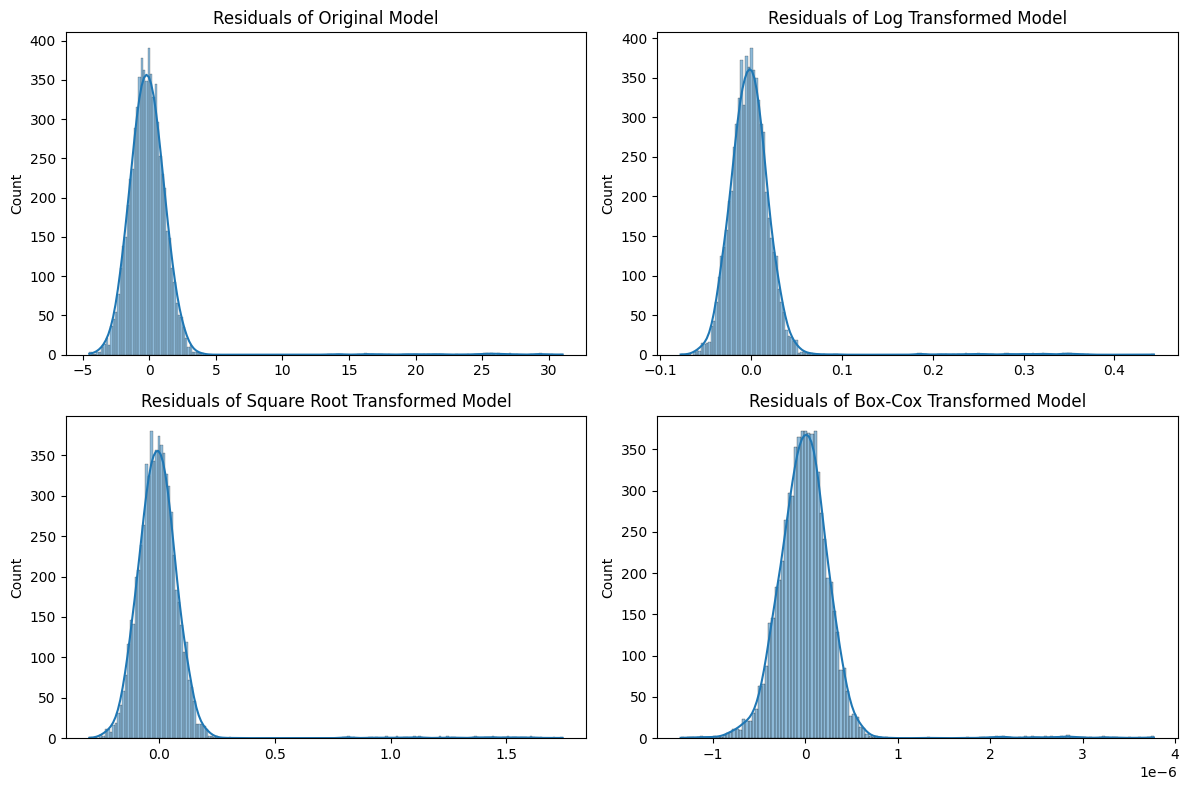

In [51]:

# Compare residuals of different models
plt.figure(figsize=(12, 8))

# Original residuals
plt.subplot(2, 2, 1)
sns.histplot(model_orig.resid, kde=True)
plt.title('Residuals of Original Model')

# Log transformation residuals
plt.subplot(2, 2, 2)
sns.histplot(model_log.resid, kde=True)
plt.title('Residuals of Log Transformed Model')

# Square root transformation residuals
plt.subplot(2, 2, 3)
sns.histplot(model_sqrt.resid, kde=True)
plt.title('Residuals of Square Root Transformed Model')

# Box-Cox transformation residuals
plt.subplot(2, 2, 4)
sns.histplot(model_boxcox.resid, kde=True)
plt.title('Residuals of Box-Cox Transformed Model')

plt.tight_layout()
plt.show()


# Log Transformation before Predictor Selection

In [16]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('data/StudentPerformanceFactors.csv')

df.columns = df.columns.str.replace(' ', '_')

continuous_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
df[continuous_vars + ['Exam_Score']] = df[continuous_vars + ['Exam_Score']].apply(lambda x: np.log1p(x))

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = pd.DataFrame(columns=[
    'Predictor', 'P-value', 'R-squared', 'Adj_R-squared', 
    'VIF', 'T-statistic', 'F-statistic', 'AIC', 'BIC',
    'ANOVA_T1_SumSq', 'ANOVA_T1_F', 'ANOVA_T1_P', 
    'ANOVA_T2_SumSq', 'ANOVA_T2_F', 'ANOVA_T2_P', 
    'ANOVA_T3_SumSq', 'ANOVA_T3_F', 'ANOVA_T3_P'
])

for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    aic = model.aic  
    bic = model.bic  
    
    correlation = np.corrcoef(X_scaled[:, i], y)[0, 1]
    
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=df_encoded).fit()
    
    anova_type1 = sm.stats.anova_lm(model_anova, typ=1)
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    anova_type1_sumsq = anova_type1['sum_sq'].iloc[0]
    
    anova_type2 = sm.stats.anova_lm(model_anova, typ=2)
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    anova_type2_sumsq = anova_type2['sum_sq'].iloc[0]
    
    anova_type3 = sm.stats.anova_lm(model_anova, typ=3)
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    anova_type3_sumsq = anova_type3['sum_sq'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'AIC': [aic],  
        'BIC': [bic],  
        'ANOVA_T1_SumSq': [anova_type1_sumsq],
        'ANOVA_T1_F': [anova_type1_f],
        'ANOVA_T1_P': [anova_type1_p],
        'ANOVA_T2_SumSq': [anova_type2_sumsq],
        'ANOVA_T2_F': [anova_type2_f],
        'ANOVA_T2_P': [anova_type2_p],
        'ANOVA_T3_SumSq': [anova_type3_sumsq],
        'ANOVA_T3_F': [anova_type3_f],
        'ANOVA_T3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

results_sorted = results.sort_values(by='ANOVA_T2_SumSq', ascending=False)
results_sorted


,Predictor,P-value,R-squared,Adj_R-squared,VIF,T-statistic,F-statistic,AIC,BIC,ANOVA_T1_SumSq,ANOVA_T1_F,ANOVA_T1_P,ANOVA_T2_SumSq,ANOVA_T2_F,ANOVA_T2_P,ANOVA_T3_SumSq,ANOVA_T3_F,ANOVA_T3_P
1,Attendance,0.000000e+00,3.631327e-01,0.363036,1.005581,61.368370,3766.076814,-22513.382604,-22499.790834,7.301683,3766.076814,0.000000e+00,7.301683,3766.076814,0.000000e+00,74.082101,3.821022e+04,0.0
0,Hours_Studied,0.000000e+00,1.947814e-01,0.194660,1.002629,39.971764,1597.741923,-20963.695050,-20950.103280,3.916564,1597.741923,4.238195e-313,3.916564,1597.741923,4.238195e-313,1258.422424,5.133669e+05,0.0
3,Previous_Scores,2.245190e-48,3.182501e-02,0.031678,1.006028,14.734782,217.113815,-19746.030817,-19732.439047,0.639921,217.113815,2.245190e-48,0.639921,217.113815,2.245190e-48,214.640366,7.282370e+04,0.0
4,Tutoring_Sessions,3.211135e-37,2.430475e-02,0.024157,1.001813,12.826994,164.531768,-19694.909514,-19681.317744,0.488707,164.531768,3.211135e-37,0.488707,164.531768,3.211135e-37,35200.291115,1.185079e+07,0.0
8,Access_to_Resources_Low,1.285712e-28,1.847526e-02,0.018327,1.339443,-11.150160,124.326068,-19655.552133,-19641.960363,0.371491,124.326068,1.285712e-28,0.371491,124.326068,1.285712e-28,94507.915296,3.162876e+07,0.0
6,Parental_Involvement_Low,3.027038e-22,1.414417e-02,0.013995,1.364009,-9.734607,94.762569,-19626.462094,-19612.870324,0.284404,94.762569,3.027038e-22,0.284404,94.762569,3.027038e-22,94060.336115,3.134067e+07,0.0
23,Parental_Education_Level_Postgraduate,1.416993e-15,9.605142e-03,0.009455,1.310972,8.003577,64.057244,-19596.112304,-19582.520534,0.193135,64.057244,1.416993e-15,0.193135,64.057244,1.416993e-15,94363.459613,3.129757e+07,0.0
22,Parental_Education_Level_High_School,2.037799e-13,8.138105e-03,0.007988,1.311985,-7.361604,54.193214,-19586.332828,-19572.741058,0.163637,54.193214,2.037799e-13,0.163637,54.193214,2.037799e-13,60442.905187,2.001748e+07,0.0
21,Learning_Disabilities_Yes,2.638326e-13,8.061897e-03,0.007912,1.002505,-7.326773,53.681608,-19585.825212,-19572.233442,0.162104,53.681608,2.638326e-13,0.162104,53.681608,2.638326e-13,105438.693936,3.491649e+07,0.0
25,Distance_from_Home_Near,7.783331e-13,7.742758e-03,0.007593,2.627337,7.179135,51.539977,-19583.699861,-19570.108091,0.155687,51.539977,7.783331e-13,0.155687,51.539977,7.783331e-13,48391.620039,1.601995e+07,0.0


# Square Root Transformation before Predictor Selection

In [17]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('data/StudentPerformanceFactors.csv')

df.columns = df.columns.str.replace(' ', '_')

continuous_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
df[continuous_vars + ['Exam_Score']] = df[continuous_vars + ['Exam_Score']].apply(lambda x: np.sqrt(x))

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = pd.DataFrame(columns=[
    'Predictor', 'P-value', 'R-squared', 'Adj_R-squared', 
    'VIF', 'T-statistic', 'F-statistic', 'AIC', 'BIC',
    'ANOVA_T1_SumSq', 'ANOVA_T1_F', 'ANOVA_T1_P', 
    'ANOVA_T2_SumSq', 'ANOVA_T2_F', 'ANOVA_T2_P', 
    'ANOVA_T3_SumSq', 'ANOVA_T3_F', 'ANOVA_T3_P'
])

for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    aic = model.aic  
    bic = model.bic  
    
    correlation = np.corrcoef(X_scaled[:, i], y)[0, 1]
    
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=df_encoded).fit()
    
    anova_type1 = sm.stats.anova_lm(model_anova, typ=1)
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    anova_type1_sumsq = anova_type1['sum_sq'].iloc[0]
    
    anova_type2 = sm.stats.anova_lm(model_anova, typ=2)
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    anova_type2_sumsq = anova_type2['sum_sq'].iloc[0]
    
    anova_type3 = sm.stats.anova_lm(model_anova, typ=3)
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    anova_type3_sumsq = anova_type3['sum_sq'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'AIC': [aic],  
        'BIC': [bic],  
        'ANOVA_T1_SumSq': [anova_type1_sumsq],
        'ANOVA_T1_F': [anova_type1_f],
        'ANOVA_T1_P': [anova_type1_p],
        'ANOVA_T2_SumSq': [anova_type2_sumsq],
        'ANOVA_T2_F': [anova_type2_f],
        'ANOVA_T2_P': [anova_type2_p],
        'ANOVA_T3_SumSq': [anova_type3_sumsq],
        'ANOVA_T3_F': [anova_type3_f],
        'ANOVA_T3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

results_sorted = results.sort_values(by='ANOVA_T2_SumSq', ascending=False)
results_sorted


,Predictor,P-value,R-squared,Adj_R-squared,VIF,T-statistic,F-statistic,AIC,BIC,ANOVA_T1_SumSq,ANOVA_T1_F,ANOVA_T1_P,ANOVA_T2_SumSq,ANOVA_T2_F,ANOVA_T2_P,ANOVA_T3_SumSq,ANOVA_T3_F,ANOVA_T3_P
1,Attendance,0.000000e+00,0.351586,0.351488,1.005581,59.844747,3581.393694,-3365.302667,-3351.710897,125.961141,3581.393694,0.000000e+00,125.961141,3581.393694,0.000000e+00,1378.806026,3.920294e+04,0.0
0,Hours_Studied,0.000000e+00,0.200597,0.200476,1.002699,40.711350,1657.413992,-1982.219169,-1968.627400,71.866919,1657.413992,1.482197e-323,71.866919,1657.413992,1.482197e-323,9349.396863,2.156183e+05,0.0
3,Previous_Scores,1.091121e-47,0.031364,0.031217,1.006360,14.624076,213.863595,-713.516826,-699.925056,11.236468,213.863595,1.091121e-47,11.236468,213.863595,1.091121e-47,3743.363790,7.124741e+04,0.0
4,Tutoring_Sessions,1.458128e-34,0.022507,0.022359,1.001707,12.332057,152.079636,-653.379651,-639.787881,8.063378,152.079636,1.458128e-34,8.063378,152.079636,1.458128e-34,122126.901282,2.303379e+06,0.0
8,Access_to_Resources_Low,6.115172e-28,0.018015,0.017867,1.339443,-11.007927,121.174451,-623.091575,-609.499805,6.454282,121.174451,6.115172e-28,6.454282,121.174451,6.115172e-28,357010.624516,6.702615e+06,0.0
6,Parental_Involvement_Low,2.150880e-21,0.013565,0.013415,1.363959,-9.530333,90.827250,-593.214616,-579.622846,4.859783,90.827250,2.150880e-21,4.859783,90.827250,2.150880e-21,355227.276347,6.639044e+06,0.0
23,Parental_Education_Level_Postgraduate,5.123375e-15,0.009225,0.009075,1.310962,7.842305,61.501755,-564.214602,-550.622832,3.305175,61.501755,5.123375e-15,3.305175,61.501755,5.123375e-15,355232.176791,6.610059e+06,0.0
22,Parental_Education_Level_High_School,6.968158e-13,0.007775,0.007625,1.312039,-7.194365,51.758887,-554.551632,-540.959862,2.785653,51.758887,6.968158e-13,2.785653,51.758887,6.968158e-13,228454.964366,4.244812e+06,0.0
21,Learning_Disabilities_Yes,1.008756e-12,0.007666,0.007516,1.002608,-7.143316,51.026958,-553.825134,-540.233364,2.746563,51.026958,1.008756e-12,2.746563,51.026958,1.008756e-12,397854.423019,7.391529e+06,0.0
25,Distance_from_Home_Near,1.813737e-12,0.007493,0.007343,2.627208,7.061644,49.866812,-552.673433,-539.081663,2.684585,49.866812,1.813737e-12,2.684585,49.866812,1.813737e-12,181862.003969,3.378130e+06,0.0


# Box-Cox Transformation before Predictor Selection

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

df = pd.read_csv('data/StudentPerformanceFactors.csv')

df.columns = df.columns.str.replace(' ', '_')

continuous_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

for var in continuous_vars + ['Exam_Score']:
    df[var], _ = stats.boxcox(df[var] + 1)

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = pd.DataFrame(columns=[
    'Predictor', 'P-value', 'R-squared', 'Adj_R-squared', 
    'VIF', 'T-statistic', 'F-statistic', 'AIC', 'BIC',
    'ANOVA_T1_SumSq', 'ANOVA_T1_F', 'ANOVA_T1_P', 
    'ANOVA_T2_SumSq', 'ANOVA_T2_F', 'ANOVA_T2_P', 
    'ANOVA_T3_SumSq', 'ANOVA_T3_F', 'ANOVA_T3_P'
])

for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    
    aic = model.aic
    bic = model.bic
    
    correlation = np.corrcoef(X_scaled[:, i], y)[0, 1]
    
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=df_encoded).fit()
    
    anova_type1 = sm.stats.anova_lm(model_anova, typ=1)
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    anova_type1_sumsq = anova_type1['sum_sq'].iloc[0]
    
    anova_type2 = sm.stats.anova_lm(model_anova, typ=2)
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    anova_type2_sumsq = anova_type2['sum_sq'].iloc[0]
    
    anova_type3 = sm.stats.anova_lm(model_anova, typ=3)
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    anova_type3_sumsq = anova_type3['sum_sq'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'AIC': [aic],  
        'BIC': [bic],  
        'ANOVA_T1_SumSq': [anova_type1_sumsq],
        'ANOVA_T1_F': [anova_type1_f],
        'ANOVA_T1_P': [anova_type1_p],
        'ANOVA_T2_SumSq': [anova_type2_sumsq],
        'ANOVA_T2_F': [anova_type2_f],
        'ANOVA_T2_P': [anova_type2_p],
        'ANOVA_T3_SumSq': [anova_type3_sumsq],
        'ANOVA_T3_F': [anova_type3_f],
        'ANOVA_T3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

results_sorted = results.sort_values(by='ANOVA_T2_SumSq', ascending=False)
results_sorted


,Predictor,P-value,R-squared,Adj_R-squared,VIF,T-statistic,F-statistic,AIC,BIC,ANOVA_T1_SumSq,ANOVA_T1_F,ANOVA_T1_P,ANOVA_T2_SumSq,ANOVA_T2_F,ANOVA_T2_P,ANOVA_T3_SumSq,ANOVA_T3_F,ANOVA_T3_P
1,Attendance,0.000000e+00,0.401169,0.401078,1.005602,66.519361,4424.825355,-171947.344733,-171933.752963,1.290522e-09,4424.825355,0.000000e+00,1.290522e-09,4424.825355,0.000000e+00,10.024600,3.437145e+13,0.0
0,Hours_Studied,0.000000e+00,0.236695,0.236580,1.002859,45.256641,2048.163520,-170343.971051,-170330.379282,7.614257e-10,2048.163520,0.000000e+00,7.614257e-10,2048.163520,0.000000e+00,74.919580,2.015266e+14,0.0
3,Previous_Scores,4.267674e-53,0.034993,0.034847,1.006396,15.476088,239.509306,-168794.773523,-168781.181753,1.125688e-10,239.509306,4.267674e-53,1.125688e-10,239.509306,4.267674e-53,20.831854,4.432334e+13,0.0
4,Tutoring_Sessions,2.106888e-42,0.027805,0.027658,1.001801,13.744179,188.902459,-168745.741278,-168732.149508,8.944501e-11,188.902459,2.106887e-42,8.944501e-11,188.902459,2.106887e-42,295.050449,6.231288e+14,0.0
8,Access_to_Resources_Low,1.035990e-30,0.019896,0.019748,1.339424,-11.579401,134.082536,-168692.213219,-168678.621449,6.400431e-11,134.082536,1.035990e-30,6.400431e-11,134.082536,1.035990e-30,746.063883,1.562928e+15,0.0
6,Parental_Involvement_Low,1.981247e-25,0.016310,0.016161,1.363832,-10.464733,109.510637,-168668.078890,-168654.487120,5.246621e-11,109.510637,1.981247e-25,5.246621e-11,109.510637,1.981247e-25,742.681635,1.550170e+15,0.0
23,Parental_Education_Level_Postgraduate,1.266912e-17,0.010999,0.010849,1.310919,8.570680,73.456551,-168632.506501,-168618.914731,3.538280e-11,73.456551,1.266912e-17,3.538280e-11,73.456551,1.266912e-17,747.190953,1.551208e+15,0.0
21,Learning_Disabilities_Yes,7.002232e-16,0.009813,0.009663,1.002780,-8.090724,65.459822,-168624.590593,-168610.998823,3.156871e-11,65.459822,7.002231e-16,3.156871e-11,65.459822,7.002232e-16,833.156229,1.727605e+15,0.0
22,Parental_Education_Level_High_School,1.922364e-15,0.009515,0.009365,1.312022,-7.965586,63.450554,-168622.600141,-168609.008371,3.060894e-11,63.450554,1.922364e-15,3.060894e-11,63.450554,1.922365e-15,476.894676,9.885750e+14,0.0
25,Distance_from_Home_Near,4.262258e-14,0.008600,0.008450,2.627491,7.569355,57.295132,-168616.498625,-168602.906855,2.766506e-11,57.295132,4.262258e-14,2.766506e-11,57.295132,4.262258e-14,383.742083,7.947408e+14,0.0
